In [9]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import pandas as pd
from PIL import Image
import seaborn as sns

## Section 1: Exploring the dataset

In [3]:
""" Analyzing the number of images present per each cattle """

# Root path containing the dataset
root_path = 'C:/Users/Kevin Sebineza/Desktop/CMU Courses/2023 - Fall/Capstone/data/OG'
num_images = 0

cattle_name = []
image_per_cattle = []

# Iterate over each subdirectory
for dirpath, dirnames, filenames in os.walk(root_path):
    # Count the number of image files in the current subdirectory
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            num_images += 1

    # Print the number of image files in the current subdirectory
    image_per_cattle.append(num_images)
    cattle_name.append(dirpath.split('/')[-1])
    # print(f"Found {num_images} images for {dirpath.split('/')[-1]}")
    num_images = 0


# Creating a dataframe showing the number of images for each cattle
cattle_df = pd.DataFrame({'cattle id': cattle_name, 'image no': image_per_cattle})
cattle_df = cattle_df.tail(-1)

# Minimum images per cattle
min_images = cattle_df['image no'].min()
cattle_with_min_images = cattle_df[cattle_df['image no'] == cattle_df['image no'].min()]['cattle id'] 

# Maximum images per cattle
max_images = cattle_df['image no'].max()
cattle_with_max_images = cattle_df[cattle_df['image no'] == cattle_df['image no'].max()]['cattle id'] 

# Average images per cattle
avg_images = round(cattle_df['image no'].mean())

print(f"Minimum number of images per cattle is {min_images}")
print(f"Maximum number of images per cattle is {max_images}")
print(f"The average number of images per cattle is {avg_images}")

Minimum number of images per cattle is 4
Maximum number of images per cattle is 70
The average number of images per cattle is 18


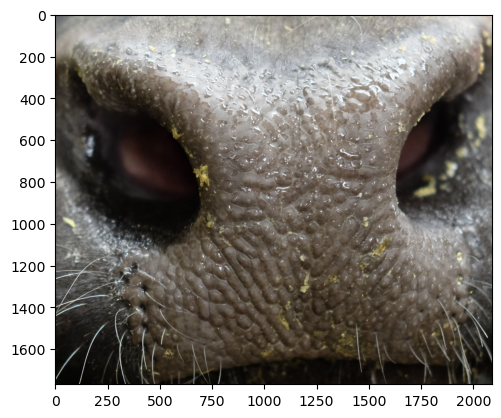

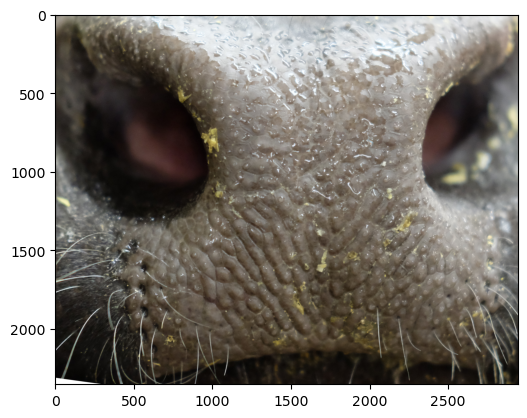

In [4]:
""" Visualizing sample images """

images = []
for subdirectory in os.listdir(root_path):
    # Construct the path to the subdirectory
    subdirectory_path = os.path.join(root_path, subdirectory)
    
    # Iterate over all files in the subdirectory and add images to the list
    for filename in os.listdir(subdirectory_path):
        img_path = os.path.join(subdirectory_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)

# Visualizing 5 sample images
for i in range(2):
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.show()

<AxesSubplot:title={'center':'Distribution of images per cattle'}, xlabel='image no', ylabel='Count'>

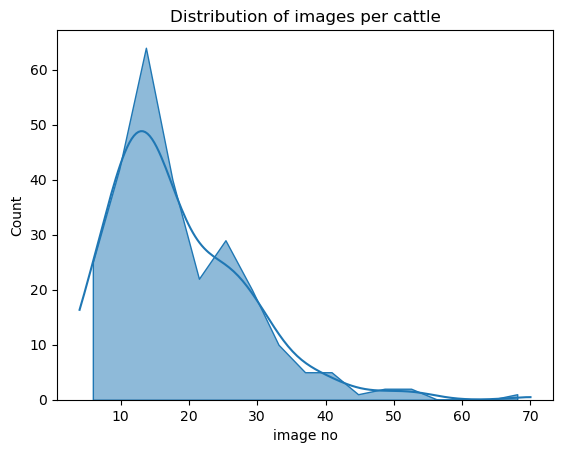

In [15]:
# Visualizing the distribution of image numbers
plt.title("Distribution of images per cattle")
sns.histplot(cattle_df['image no'], kde=True, element="poly")

In [12]:
# Showing the statistical distribution of image number per cattle
cattle_df.describe()

,image no
count,268.000000
mean,18.369403
std,10.165380
min,4.000000
25%,11.750000
50%,16.000000
75%,25.000000
max,70.000000
